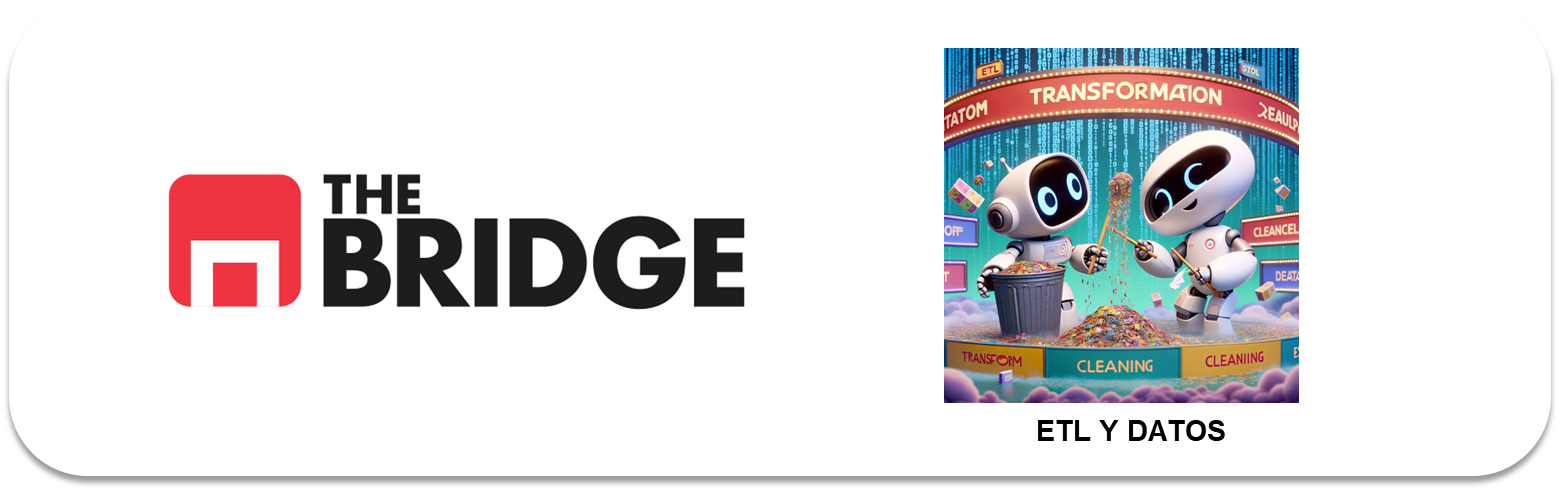

## PRACTICA OBLIGATORIA: Transformación y limpieza

* La práctica obligatoria de esta unidad consiste en cargar un dataset de Netflix y hacer un repaso completo del mismo, limpiando, transformando y creando algunas variables. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

## #0 Carga de datos y primera exploración

In [64]:
import numpy as np
import pandas as pd

df_peliculas = pd.read_csv("data/dataset_netflix_titles.csv")

1. Haz una primera exploración de los datos. Haz una primera visualización de la tabla, muestra la información general, la descripción de las variables numéricas, las columnas y muestra la distribución de datos de tres columnas escogidas por ti.

In [65]:
df_peliculas.value_counts()

show_id  type   title                        director            cast                                                                                                                                                                       country                                        date_added          release_year  rating  duration  listed_in                                           description                                                                                                                                            
s997     Movie  HOMUNCULUS                   Takashi Shimizu     Go Ayano, Ryo Narita, Yukino Kishii, Anna Ishii, Seiyo Uchino                                                                                                              Japan                                          April 22, 2021      2021          TV-MA   116 min   Horror Movies, International Movies, Thrillers      Truth and illusion blurs when a homeless amnesiac awakens from an experime

In [66]:
df_peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [67]:
print(df_peliculas.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [68]:
print(df_peliculas.describe())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


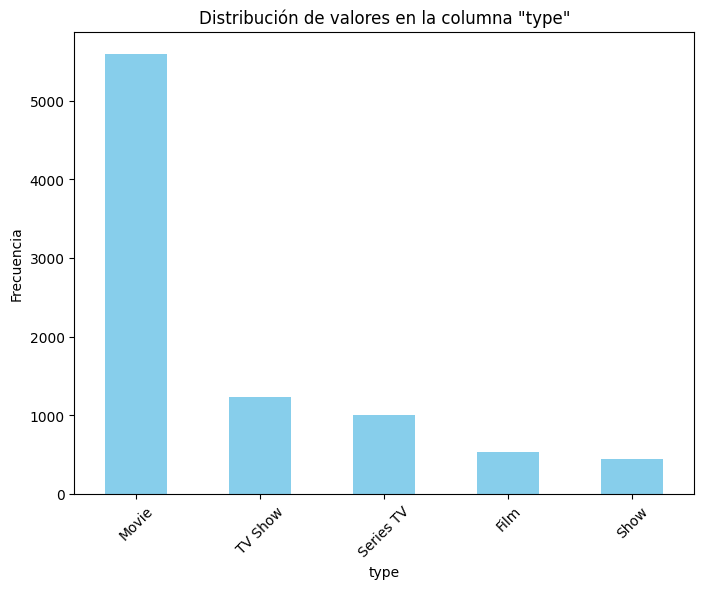

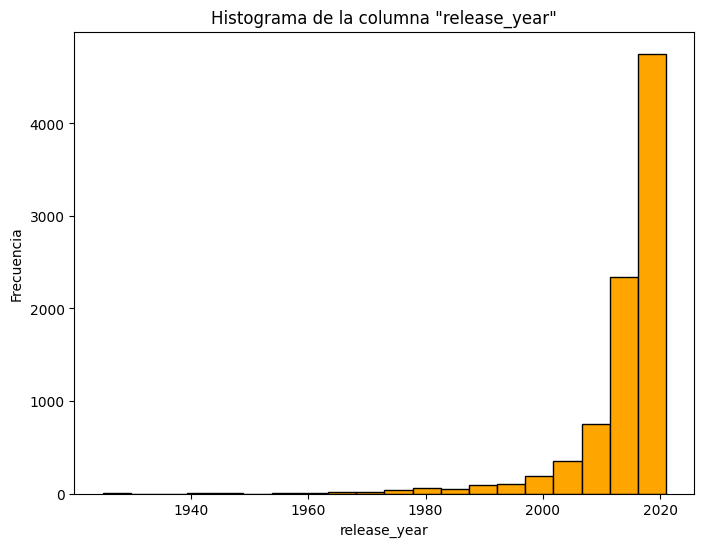

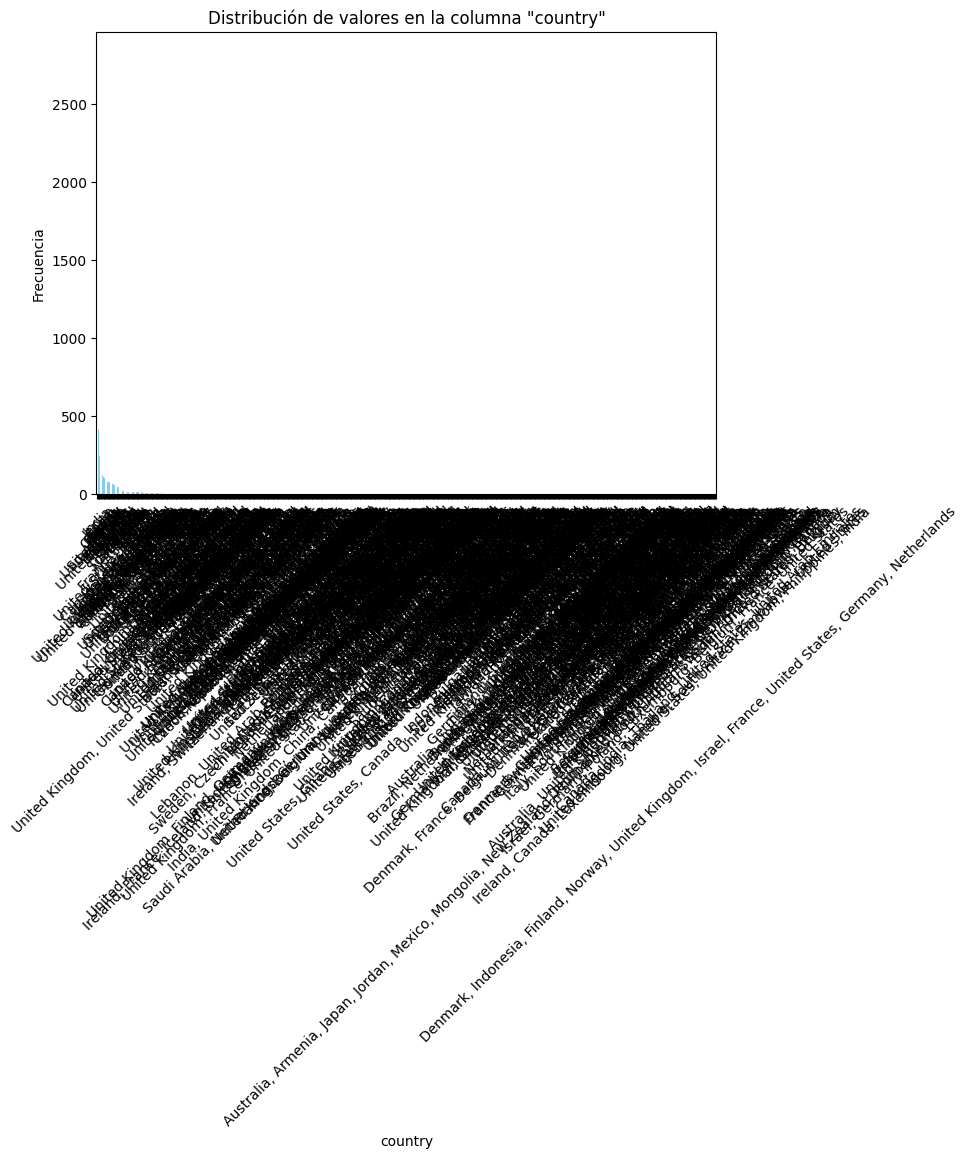

In [69]:
import matplotlib.pyplot as plt

# Seleccionar tres columnas
columnas_seleccionadas = ['type', 'release_year', 'country']

# Mostrar la distribución de cada columna seleccionada
for columna in columnas_seleccionadas:
    if df_peliculas[columna].dtype == 'object':
        # Para columnas categóricas, mostramos un conteo de valores
        plt.figure(figsize=(8, 6))
        df_peliculas[columna].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Distribución de valores en la columna "{columna}"')
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)
        plt.show()
    else:
        # Para columnas numéricas, mostramos un histograma
        plt.figure(figsize=(8, 6))
        plt.hist(df_peliculas[columna], bins=20, edgecolor='black', color='orange')
        plt.title(f'Histograma de la columna "{columna}"')
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')
        plt.show()


## #1 Duplicados y cardinalidad

In [70]:
cardinalidad = df_peliculas.nunique()



print(cardinalidad)


show_id         8807
type               5
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64


In [71]:
duplicados = df_peliculas.duplicated()
print(duplicados)

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool


1. ¿Existen filas duplicadas?¿Cuántas?

In [72]:
hay_duplicados = df_peliculas.duplicated().any()


if hay_duplicados:
    print("Sí, hay filas duplicadas en el DataFrame.")
else:
    print("No hay filas duplicadas en el DataFrame.")


No hay filas duplicadas en el DataFrame.


2. Deshazte de las filas duplicadas, si las hubiera. Quédate con las últimas copias.

3. Ahora que no hay duplicados, tiene sentido calcular la cardinalidad de cada columna. Haz un programa que la obtenga y guarde el resultado en un diccionario con claves el nombre de las columnas y valores la cardinalidad (tal y como la hemos visto en el workout) de cada columna. [Nota: ¿has tenido en cuenta los valores nulos?]

In [73]:
cardinalidad = df_peliculas.nunique(dropna=False)


cardinalidad_dict = cardinalidad.to_dict()


print("Cardinalidad de cada columna:")
print(cardinalidad_dict)


Cardinalidad de cada columna:
{'show_id': 8807, 'type': 5, 'title': 8807, 'director': 4529, 'cast': 7693, 'country': 749, 'date_added': 1768, 'release_year': 74, 'rating': 18, 'duration': 221, 'listed_in': 514, 'description': 8775}


4. Haz un pequeño programa que recorra el diccionario y nos diga si hay alguna columna que pueda ser un buen índice (cardinalidad = 100%)


In [74]:

num_filas = len(df_peliculas)


for columna, card in cardinalidad_dict.items():
    if card == num_filas:
        print(f"La columna '{columna}' podría ser un buen índice, ya que tiene una cardinalidad del 100% ({card} valores únicos).")
    else:
        print(f"La columna '{columna}' no es un buen índice, ya que tiene {card} valores únicos de {num_filas} filas.")



La columna 'show_id' podría ser un buen índice, ya que tiene una cardinalidad del 100% (8807 valores únicos).
La columna 'type' no es un buen índice, ya que tiene 5 valores únicos de 8807 filas.
La columna 'title' podría ser un buen índice, ya que tiene una cardinalidad del 100% (8807 valores únicos).
La columna 'director' no es un buen índice, ya que tiene 4529 valores únicos de 8807 filas.
La columna 'cast' no es un buen índice, ya que tiene 7693 valores únicos de 8807 filas.
La columna 'country' no es un buen índice, ya que tiene 749 valores únicos de 8807 filas.
La columna 'date_added' no es un buen índice, ya que tiene 1768 valores únicos de 8807 filas.
La columna 'release_year' no es un buen índice, ya que tiene 74 valores únicos de 8807 filas.
La columna 'rating' no es un buen índice, ya que tiene 18 valores únicos de 8807 filas.
La columna 'duration' no es un buen índice, ya que tiene 221 valores únicos de 8807 filas.
La columna 'listed_in' no es un buen índice, ya que tiene 51

Bonus: Haz los ejercicios 3 y 4 pero usando un objeto `Series` en vez de un diccionario.

In [75]:
import pandas as pd


df_peliculas = pd.read_csv("data/dataset_netflix_titles.csv")

# Obtener la cardinalidad de cada columna, incluyendo los valores nulos
cardinalidad_serie = df_peliculas.nunique(dropna=False)

# Mostrar los resultados como Serie
print("Cardinalidad de cada columna:")
print(cardinalidad_serie)


Cardinalidad de cada columna:
show_id         8807
type               5
title           8807
director        4529
cast            7693
country          749
date_added      1768
release_year      74
rating            18
duration         221
listed_in        514
description     8775
dtype: int64


In [76]:


# Obtener el número total de filas
num_filas = len(df_peliculas)

# Crear una Serie indicando si cada columna puede ser un buen índice
buen_indice_serie = cardinalidad_serie == num_filas

# Mostrar los resultados
print("Columnas que podrían ser un buen índice (cardinalidad = 100%):")
print(buen_indice_serie[buen_indice_serie])


Columnas que podrían ser un buen índice (cardinalidad = 100%):
show_id    True
title      True
dtype: bool


## #2 Limpieza y transformación (I)

El primer paso en la limpieza es intentar detectar que campos están "sucios", una posible guía podría ser, encontrar:  
* Campos numéricos inconsistentes (el típico campo con la coma y el punto decimal mezclado, o con formatos numéricos combinados)  
* Campos con valores inconsistentes (por ejemplo aparecen valores que no tienen relación con la columna en la que están porque están mal colocados, porque se han incluido por error, valores medidos en una unidad frente a otros medidos en otra)  
* Campos con valores que son iguales pero están representados de formas diferentes (por ejemplo un actor que unas veces aparece con el nombre en un orden y otras veces con el nombre en otro, o el nombre de un país como USA que aparezca como EEUU otras veces, o cadenas que tienen espacios al principio y al final y Python las considera diferentes: " Clint Eastwood " y "Clint Eastwood").  


Vamos a hacer un pequeño análisis siguiendo las pautas anteriores pero sin profundizar en ellas, en tu EDA sí que tendrás que hacerlo. Para ello nos vamos a centrar en los campos con cardinalidad menor que un 10% (el resto requiere un análsis mucho más exahustivo que se nos va fuera del alcance de la práctica, pero, repito en tu EDA tendrás que hacerlo)

1. Antes de centrarnos en esos campos, quita los espacios en blanco que pueda haber antes o después de cada valor string. (utiliza el método de cadenas de pandas, `strip`). Por ejemplo (como guía pero no como única solución) recorre con un for el nombre de las columnas y ve aplicando el método columna a columna. Pero puedes hacerlo como tú quieras, claro.

Bonus: ¿Se te ocurre alguna forma rápida, que no necesariamente completa, de ver si ha afectado en algo esta operación?

2. Lista los campos con cardinalidad menor a 10%

3. Para los campos que hayas obtenido, muestra su distribución de valores, sus valores únicos y determina si crees que se puede o debe hacer alguna acción de limpieza o transformación directa. No le des muchas vueltas.

4. Limpia o simplifica/transforma dos de los campos detectados en 3, si hay al menos dos, si no, uno. Para ello puedes:  
4.1 Cualquier agrupa los valores de los campos tipo categoría con categorías similares que se llamen distinto.  
4.2 Quita valores extraños o que no correspondan. Conviertelos a "", y luego busca un valor para sustituirlos.

5. Convierte o cambia el tipo de la columna con fechas en strings a un tipo datetime. La columna que son solo años es mejor dejarla como integer, porque se opera muy fácil así. Tendrás que analizar los argumentos de pd.datetime y jugar con ellos para poder conseguirlo.

## #3 Tratamiento de Missings/Nulos

Es hora de tratar los nulos. Así que habrá que identificarlos para empezar.

1. Haz una lista con las columnas que contienen valores nulos. Obtenla a "mano" mirando la salid del método info o bien haz un programa que las obtenga de forma automática.

2. Obten el porcentaje de valores nulos para cada una de las columnas.

3. Corrige de la mejor manera que se te ocurra las dos columnas con menor porcentajes de nulos.

4. En un caso como este, que no hay apenas valores numéricos y las columnas con nulos no son categóricas, es mejor o deshacerse de los nulos o bien simplemente marcarlos pero convertidos a un valor más manejable y del tipo del resto de valores de la columna en la que aparecen. Por eso cambia los nulos en las columnas que no hayas tratado en el apartado anterior por "UNK" o por "".

5. Comprueba ahora que no hemos generado duplicados, si existiesen borralos y quedate la primera ocurrencia.

## #4 Generación de nuevos datos

Para terminar de hacer nuestro procesado, intentemos enriquecer el dataset y obtener alguna información adicional.

1. Separa el dataset en dos dataframes,uno de películas y otro de series. A veces aunque los datos parecen de la misma naturaleza, puede ser bueno separarlos para trabajar con ellos de forma independiente.

2. Ahora además podemos sacarle más provecho a algunos campos, por ejemplo duration. Muestra la distribución de valores para cada dataframe del campo "duration".

3. Convierte los valores de "duration" en cada dataframe a valores numéricos y cambia en el de las series el nombre por uno más representativo. Se valorará el emplear una expresión regular para obtener la información.

4. BONUS: Crea un campo "Posible_Secuela" en el dataset de películas con valor a False por defecto. Intenta (con expresiones regulares si es posible) hacer una función que aplicada (con apply) a un título determine si es una posible secuela o no. Emplea la función (con apply) para rellenar el campo "Posible_Secuela". Nota: No hace falta que sea infalible,ni que las cace todas sino que tenga una lógica defendible, piensa en la forma que normalmente tienen las secuelas, por ejemplo la de Terminator.m..